# Análise de Ações utilizando o Modelo CAPM

Neste projeto, realizamos a análise de risco e retorno de ações selecionadas do mercado brasileiro através do modelo CAPM (Capital Asset Pricing Model).

O objetivo foi selecionar ações a partir de filtros fundamentalistas, calcular suas métricas de risco (Beta) e retorno excedente (Alpha) e analisar os resultados para construção de uma carteira otimizada.


Importação de Pacotes

In [ ]:
import numpy as np
import statsmodels.formula.api as sm 
from bcb import sgs 
import yfinance as yf 
import pandas as pd
import requests
import io
import datetime
import statsmodels.formula.api as sm 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ativos = ['BBAS3', 'ITUB3', 'BBDC3', 'BMIN4', 'TAEE4', 'CEEB3', 'CMIG4', 'ENGI4', 'ALUP4', 'CSMG3', 'SAPR4', 
          'SBSP3', 'VALE3', 'PETR3', 'GGBR4', 'AGRO3','SOJA3', 'ITSA4',
          'BALM3', 'CEAB3', '^BVSP']

In [3]:
ativos = [acao + '.SA' if acao != '^BVSP' else acao for acao in ativos]

Importação do historico de fechamento

In [5]:
inicio = pd.to_datetime('2022-01-01')
fim = pd.to_datetime('2025-04-30')

In [6]:

#coleta os dados do yf

dados = (yf.download(ativos,  start = inicio, end = fim, auto_adjust=False)['Close'])

[*********************100%***********************]  21 of 21 completed


In [7]:
dados

Ticker,AGRO3.SA,ALUP4.SA,BALM3.SA,BBAS3.SA,BBDC3.SA,BMIN4.SA,CEAB3.SA,CEEB3.SA,CMIG4.SA,CSMG3.SA,...,GGBR4.SA,ITSA4.SA,ITUB3.SA,PETR3.SA,SAPR4.SA,SBSP3.SA,SOJA3.SA,TAEE4.SA,VALE3.SA,^BVSP
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,28.360001,7.138640,15.650000,14.410000,15.045454,18.690001,5.91,33.299999,7.621301,12.160000,...,21.634920,7.406317,17.618181,31.520000,3.68,39.950001,15.61,12.10,78.000000,103922.0
2022-01-04,27.400000,7.183090,15.650000,14.425000,15.100000,18.000000,5.52,33.349998,7.615384,12.150000,...,21.936506,7.463794,18.009090,31.920000,3.65,38.849998,14.91,12.19,77.080002,103514.0
2022-01-05,27.490000,6.943061,15.500000,14.185000,15.000000,17.510000,5.33,35.959999,7.372781,11.930000,...,21.571428,7.381684,17.645454,30.610001,3.61,37.180000,14.02,12.14,77.809998,101006.0
2022-01-06,28.270000,6.863051,15.500000,14.300000,15.163636,17.510000,5.17,35.959999,7.213017,11.580000,...,21.579365,7.447372,17.963636,30.580000,3.51,36.209999,14.19,12.12,79.379997,101561.0
2022-01-07,28.059999,7.023071,15.500000,14.315000,15.227272,17.510000,5.17,35.959999,7.254437,11.590000,...,21.769840,7.537693,18.245455,30.830000,3.56,35.459999,14.12,12.10,84.000000,102719.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-23,21.740000,9.590000,16.450001,28.040001,11.690000,16.870001,12.92,37.889999,10.450000,20.650000,...,15.060000,10.340000,29.719999,32.750000,5.74,112.610001,10.23,11.80,54.459999,132216.0
2025-04-24,21.940001,9.790000,16.450001,27.700001,11.910000,16.870001,13.43,37.889999,10.640000,20.950001,...,15.370000,10.560000,30.379999,32.509998,5.76,114.940002,10.60,12.05,55.310001,134580.0
2025-04-25,21.559999,9.990000,14.040000,28.010000,11.970000,16.870001,13.42,37.889999,10.930000,21.240000,...,15.330000,10.570000,30.260000,32.669998,5.92,115.379997,10.69,11.94,53.849998,134739.0


In [8]:

api_url = ('https://api.bcb.gov.br/dados/serie/bcdata.sgs.11/dados?formato=csv&dataInicial={}&dataFinal={}'
           .format(inicio.strftime('%d/%m/%Y'), fim.strftime('%d/%m/%Y')))

selic = requests.get(api_url)
selic_io = io.StringIO(selic.text)
selic = (pd.read_csv(selic_io, sep=';', decimal=',')
         .rename(columns={'valor': 'selic', 'data': 'Date'})
         .assign(Date = lambda x:pd.to_datetime(x['Date'], dayfirst=True)))

Calculo da SELIC mensal e semanal

In [ ]:
#
selic = (selic.assign(selic = lambda x: x["selic"]/100,
                      selic_m = lambda x: (1 + x['selic'])**(1/12)-1,
                      selic_w = lambda x: (1 + x['selic'])**(1/52) - 1))



In [10]:
selic

,Date,selic,selic_m,selic_w
0,2022-01-03,0.000347,0.000029,0.000007
1,2022-01-04,0.000347,0.000029,0.000007
2,2022-01-05,0.000347,0.000029,0.000007
3,2022-01-06,0.000347,0.000029,0.000007
4,2022-01-07,0.000347,0.000029,0.000007
...,...,...,...,...
829,2025-04-24,0.000525,0.000044,0.000010
830,2025-04-25,0.000525,0.000044,0.000010
831,2025-04-28,0.000525,0.000044,0.000010
832,2025-04-29,0.000525,0.000044,0.000010


Calculo do Log_Retorno dos ativos

In [ ]:
log_retornos = (np.log(dados.resample('M').last())
                - np.log(dados.resample('M').last().shift(1))).dropna()

In [12]:
log_retornos = log_retornos.reset_index()

In [13]:
log_retornos['Date'] = pd.to_datetime(log_retornos['Date'])
selic['Date'] = pd.to_datetime(selic['Date'])

Criação de um DataFrame unico com os retornos das açoes e a SELIC 

In [ ]:
data = (log_retornos.merge (selic, how = 'inner', left_on='Date', right_on='Date').rename(columns = {'^BVSP':'BVSP'}))

**Utilizando dict compreension para criar as variaveis de exesso de retorno**

In [ ]:
colunas_acoes = [col for col in data.columns if col not in ['selic', 'selic_m', 'selic_w', 'Date']]

data = (data.assign(**{f'e_{col}': lambda x, c=col: x[c] - x['selic_m'] for col in colunas_acoes}).rename(columns=lambda x: x.replace('.SA', '')))

In [31]:
data.head()

,Date,AGRO3,ALUP4,BALM3,BBAS3,BBDC3,BMIN4,CEAB3,CEEB3,CMIG4,...,e_GGBR4,e_ITSA4,e_ITUB3,e_PETR3,e_SAPR4,e_SBSP3,e_SOJA3,e_TAEE4,e_VALE3,e_BVSP
0,2022-03-31,-0.030600,0.065560,-0.091785,-0.014590,0.068524,-0.118393,0.063692,0.069688,0.172508,...,0.190694,0.070286,0.077925,-0.031599,0.027159,0.141582,-0.049587,0.108508,0.035309,0.058803
1,2022-05-31,-0.058457,0.010084,-0.039434,0.097442,0.124097,-0.026541,-0.342426,-0.005540,0.031866,...,0.041969,0.040392,0.109297,-0.005437,0.020266,0.027645,0.042616,-0.089884,0.034418,0.031666
2,2022-06-30,-0.273846,-0.037483,0.000000,-0.092638,-0.160291,-0.042260,-0.301714,0.039488,-0.115425,...,-0.266355,-0.139699,-0.137150,-0.085359,-0.059567,-0.082179,-0.261453,-0.042375,-0.118752,-0.122245
3,2022-08-31,0.177167,0.049526,-0.072321,0.147576,0.090461,-0.025899,0.139298,0.027895,0.073727,...,-0.047770,0.058467,0.087708,0.005623,-0.057671,0.095532,0.152643,0.032940,-0.078295,0.059763
4,2022-09-30,0.053038,-0.023380,-0.124053,-0.079084,0.029240,0.073679,0.015361,-0.011967,-0.117370,...,0.046867,0.061418,0.060423,-0.116615,-0.011406,0.009072,-0.019429,-0.061749,0.110514,0.004640


**Estimativa do CAPM em loop com statsmodels**

In [ ]:

resultados = []

for col in data.columns:
    if 'e_' in col and col != 'e_BVSP':
        #Definindo a formula da regressão
        formula = f'{col} ~ e_BVSP'

        #rodando a regressão OLS 
        modelo = sm.ols(formula, data=data).fit()

        #Extraindo os resultados e adicionando à lista 
        resultados.append({
            'Ação': col.replace('e_', ''),
            'Beta': modelo.params['e_BVSP'],
            'Alfa': modelo.params['Intercept'],
            'P_Valor_Beta': modelo.pvalues['e_BVSP'],
            'P_Valor_Alfa': modelo.pvalues['Intercept'],
            'R_Quadrado': modelo.rsquared
        })

**Resultados e análise**

In [20]:
df_resultados = pd.DataFrame(resultados)
df_resultados

,Ação,Beta,Alfa,P_Valor_Beta,P_Valor_Alfa,R_Quadrado
0,AGRO3,1.137191,-0.038010,2.788054e-05,0.003465,0.497226
1,ALUP4,0.542438,-0.002412,3.009365e-05,0.674017,0.494361
2,BALM3,0.113106,0.000449,7.324356e-01,0.979428,0.004572
3,BBAS3,0.796180,0.010151,3.115250e-04,0.324105,0.399069
4,BBDC3,1.355223,-0.017401,5.306448e-08,0.077800,0.686030
5,BMIN4,-0.107596,-0.007563,6.515512e-01,0.547589,0.007965
6,CEAB3,2.519960,0.020997,8.996345e-04,0.558650,0.350731
7,CEEB3,0.425115,0.004692,2.048669e-02,0.609632,0.189799
8,CMIG4,0.527214,-0.000069,3.063791e-02,0.995517,0.167374
9,CSMG3,0.905267,-0.005554,6.681334e-03,0.734285,0.250469


In [28]:
df_resultados.to_csv('resultados.csv', index=False)

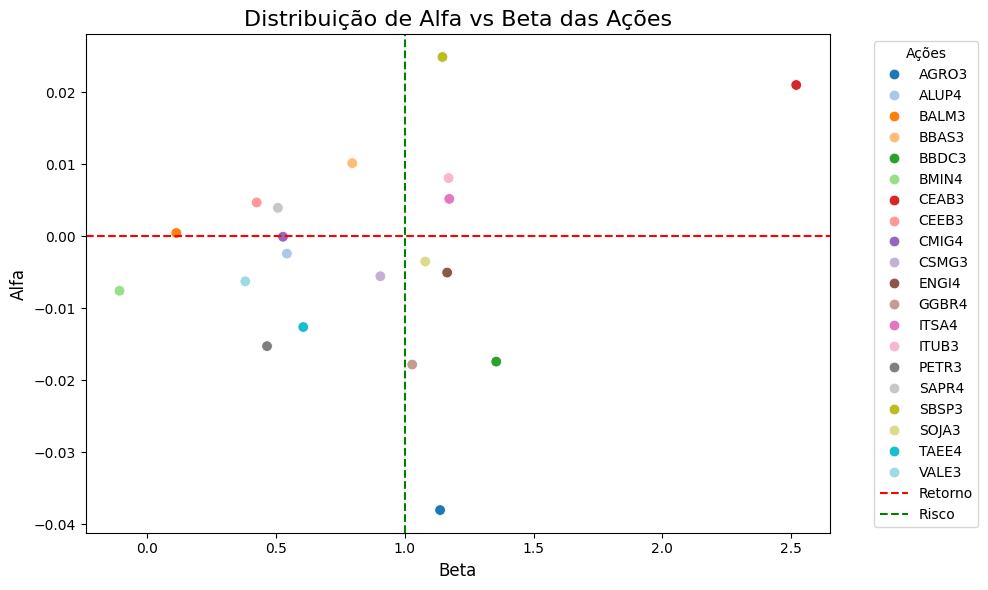

In [26]:
# Criação do gráfico de dispersão
plt.figure(figsize=(10, 6))  # Tamanho da figura
sns.scatterplot(data=df_resultados, x='Beta', y='Alfa', hue='Ação', palette='tab20', s=60)

# Adicionando título e rótulos aos eixos
plt.title('Distribuição de Alfa vs Beta das Ações', fontsize=16)
plt.xlabel('Beta', fontsize=12)
plt.ylabel('Alfa', fontsize=12)


# Adicionar uma linha reta horizontal saindo de Y=1 e uma linha vertical saindo de X=0
plt.axhline(y=0, color="red", linestyle="--", label="Retorno")
plt.axvline(x=1, color="green", linestyle="--", label="Risco")
plt.legend(title='Ações', bbox_to_anchor=(1.05, 1), loc='upper left')

# Exibindo o gráfico
plt.tight_layout()
plt.show()

Ao visualização gráfica da tabela nos permite o seguinte resultado:
A análise dos resultados nos indicam que as ações acima da linha do
retorno(𝛼𝑖>0) e a esquerda da linha de risco(𝛽𝑖<1), são as melhores pois além de
serem melhor arriscadas que o mercado, possivelmente também terão um retorno
maior. Sendo elas: BALM3, BALM3, CEEB3, SAPR4.

A análise dos p-valores dos coeficientes estimados indicou baixa significância estatística. Este resultado pode ser atribuído ao reduzido número de observações disponíveis para a modelagem, uma vez que o período analisado compreende apenas três anos de dados históricos.

**Calculo do retorno médio da carteira inicial e da carteira final(escolhida após análise do beta e alfa de cada ação)**

In [ ]:
df_otimo = df_resultados[df_resultados['Ação'].isin(['BBAS3', 'BALM3', 'CEEB3',
          'SAPR4'])]

In [24]:
retorno_total = df_resultados["Alfa"].mean()  # Retorno médio da carteira equitativa
retorno_selecionado = df_otimo["Alfa"].mean()  # Retorno médio da carteira selecionada
    

print(f"Retorno médio da carteira inicial: {retorno_total:.4f}")
print(f"Retorno médio da carteira final: {retorno_selecionado:.4f}")

Retorno médio da carteira inicial: -0.0027
Retorno médio da carteira final: 0.0048
